<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método de Monte Carlo

El método de Monte Carlo es una técnica computacional que utiliza muestreo aleatorio para obtener resultados numéricos en problemas matemáticos complejos. Su nombre proviene del famoso casino de Monte Carlo, debido al elemento de aleatoriedad involucrado.

El método se basa en:

1. Ley de los Grandes Números: A medida que el número de muestras aumenta, el promedio de los resultados converge al valor esperado.
2. Teorema del Límite Central: La distribución del promedio muestral tiende a una distribución normal alrededor de la media verdadera.

**Implementación:**

- Representar el problema como un modelo probabilístico

- Generar muestras aleatorias del modelo

- Calcular estadísticas a partir de estas muestras

Este código implementa el método de Monte Carlo para estimar el área bajo la curva de la función

$ f(x) = \sqrt{arctan(x)}$

entre 0 y 1


In [90]:
import random #Genera números aleatorios
import matplotlib.pyplot as plt #Graficar
import numpy as np  #Operaciones matemáticas y arreglos




**Función objetivo**

Esta es la función cuya área queremos determinar.

In [68]:
def f(x):
      return np.sqrt(np.arctan(x))

- El valor real de la integral es aproximadamente: 0.6295

- El Método de Monte Carlo dará una estimación cercana a este valor

- A mayor n, mejor será la aproximación

In [98]:
from scipy.integrate import quad
def f(x):
    return np.sqrt(np.arctan(x))
valor, error = quad(f, 0, 1)
print(f"Valor de la integral: {valor:.5f}")

Valor de la integral: 0.62982


Genera un array de 400 puntos espaciados uniformemente entre 0 y 1

In [96]:
x = np.linspace(0,1,400)
y =f(x)

In [97]:
f(1)

np.float64(0.8862269254527579)

In [84]:
u1 = random.random() # x aleatorioa en [0,1]
u2 = random.random() # y aleatorio en [0,1]

In [94]:
def dardo1(n):
    exitos = 0 #Conatdor
    for i in range(n):
        u1 = random.random()
        u2 = random.random()
        if  u2 <= f(u1):# Condición si se encuentra debajo de la curva
             exitos+=1
    prob = exitos/n  #Probabilidad de punto bajo la curva
    return prob

In [95]:
dardo1(100)

0.66

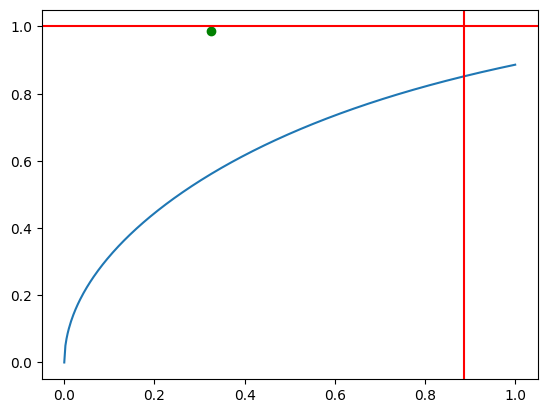

In [87]:
plt.plot(x,y)
plt.axhline(1, color="red")
plt.axvline(f(1), color = "red")
plt.scatter(u1,u2, color= "green")

In [88]:
def experimento(m):
    lista = []
    for i in range(m):
        d = dardo1(i+1)
        lista.append(d)
    return lista

In [89]:
L = experimento(3000) # Realiza 3000 estimaciones progresivas

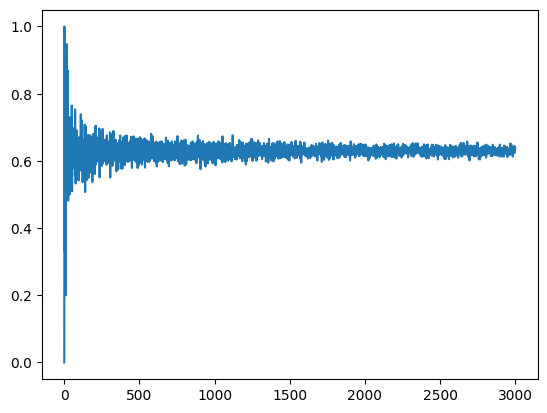

In [36]:
plt.plot(L)

In [37]:
print(np.mean(L)) #Promedio de todas las estimacones

0.6294884288545072


In [38]:
print(L[-1]) #Ultima estimación con n = 3000

0.6396666666666667


Graficando todos los puntos
Visualizar cuales caen dentro o fuera del área

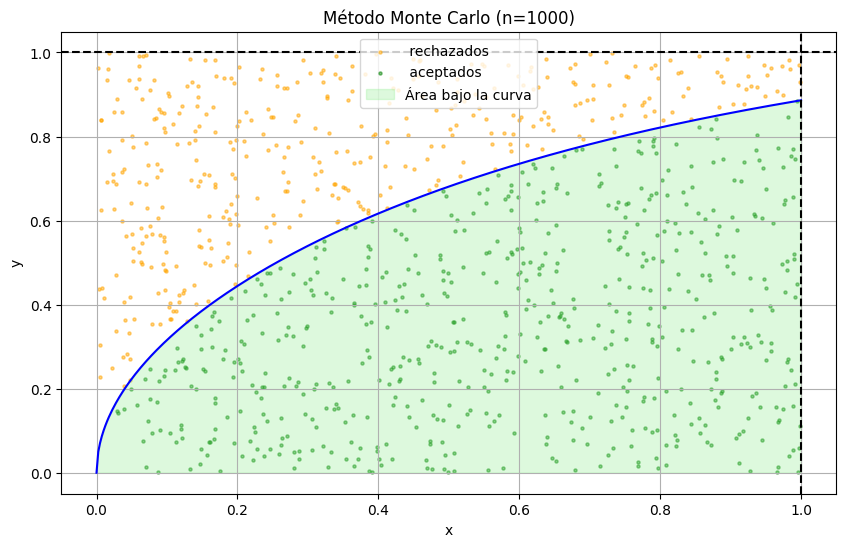

Valor aproximado de la integral: 0.61300


In [104]:


def f(x):
    return np.sqrt(np.arctan(x))


n = 1000  # Número de puntos
x = np.linspace(0, 1, 400)
y = f(x)


puntos_aceptados = []
puntos_rechazados = []

# Generar puntos
for _ in range(n):
    u1, u2 = random.random(), random.random()
    if u2 <= f(u1):
        puntos_aceptados.append((u1, u2))
    else:
        puntos_rechazados.append((u1, u2))


aceptados = np.array(puntos_aceptados)
rechazados = np.array(puntos_rechazados)


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
plt.scatter(rechazados[:, 0], rechazados[:, 1], color='orange', s=5, alpha=0.5, label=' rechazados')
plt.scatter(aceptados[:, 0], aceptados[:, 1], color='green', s=5, alpha=0.5, label=' aceptados')
plt.fill_between(x, y, color='lightgreen', alpha=0.3, label='Área bajo la curva')
plt.axhline(1, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.title(f'Método Monte Carlo (n={n})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

integral_aproximada = len(aceptados) / n
print(f"Valor aproximado de la integral: {integral_aproximada:.5f}")